In [1]:
%config IPCompleter.greedy=True # Enable intellisense

In [2]:
import modules.oiplib as lib
from skimage import transform

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b4a9af0>)

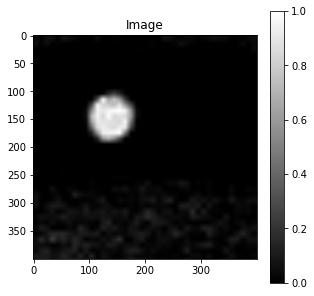

In [3]:
img = lib.loadImage("../images/clusters/cluster103.png")
img = lib.rgb2GrayLuminosity(img)
img = transform.rescale(img, 10)
# img = lib.threshold(img*255, 128)
lib.showImage(img, vmax=1)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bb6f930>)

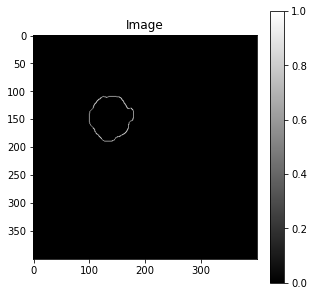

In [4]:
from skimage import feature

edges = feature.canny(img, sigma=2)
# edges, phi, x, y = lib.detect_edges(img)
# _, edges = lib.laplace_sharpen(img, Filter="L4")

lib.showImage(edges, vmax=1)

In [11]:
import numpy as np
import math

hough_radii = np.arange(30, 50, 1) # Since the radius should be from 3.5 to 4.5

# hough_radii = np.arange(0, 10, 0.1)

hough = transform.hough_circle(edges, hough_radii)

In [18]:
accumulator, x, y, radii = transform.hough_circle_peaks(hough, hough_radii, num_peaks=1)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb5aab0>)

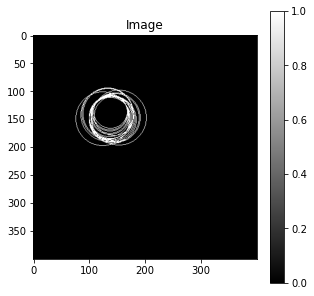

In [19]:
import matplotlib.pyplot as plt
from skimage import draw

result = np.zeros(img.shape)

for center_y, center_x, radius in zip(y, x, radii):
    circy, circx = draw.circle_perimeter(center_y, center_x, radius,
                                    shape=img.shape)
    result[circy, circx] = 1

lib.showImage(result, vmax=1)

In [14]:
radii

array([38, 37, 40, 39, 36, 31, 41, 36, 40, 38, 37, 37, 37, 32, 32, 36, 39,
       35, 33, 40, 31, 35, 38, 39, 41, 34, 36, 34, 42, 33, 30, 42, 33, 35,
       42, 30, 30, 41, 42, 44, 35, 38, 43, 31, 45, 43, 43, 39, 34, 34, 30,
       44, 31, 32, 45, 41, 32, 33, 40, 43, 44, 45, 46, 44, 46, 46, 47, 49,
       49, 45, 47, 46, 47, 48, 49, 48, 48, 47, 48, 49])

In [15]:
def radiiToSize(radii):
    return radii * 2 * 8.2

In [16]:
radiiToSize(np.average(radii)/10)

64.78